In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import warnings
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
%matplotlib inline

In [42]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pokemon.csv")

In [43]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        424
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

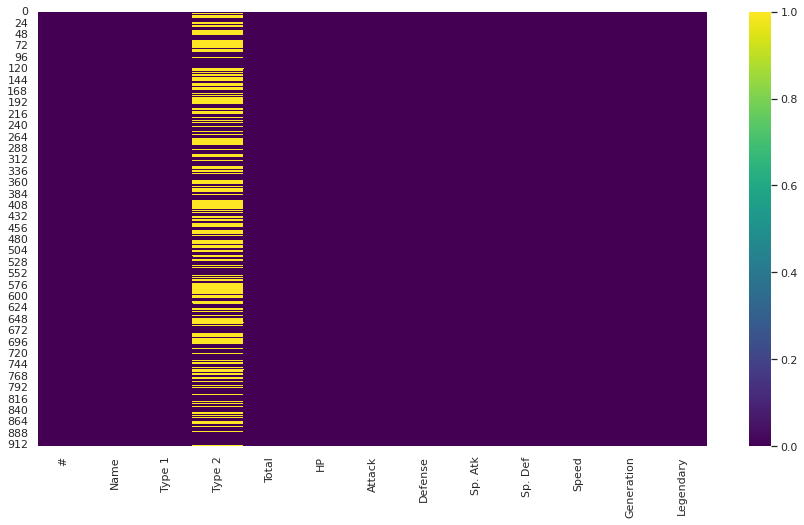

In [44]:
sns.set()
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [45]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,805,Stakataka,Rock,Steel,570,61,131,211,53,101,13,7,True
912,806,Blacephalon,Fire,Ghost,570,53,127,53,151,79,107,7,True
913,807,Zeraora,Electric,NaN,600,88,112,75,102,80,143,7,True
914,808,Meltan,Steel,NaN,300,46,65,65,55,35,34,7,True


In [46]:
# Get unique count for each variable
df.nunique()

#             809
Name          916
Type 1         18
Type 2         18
Total         208
HP             98
Attack        120
Defense       113
Sp. Atk       116
Sp. Def       100
Speed         118
Generation      8
Legendary       2
dtype: int64

In [47]:
df['Type 2'].fillna('Missing',inplace=True)
df.isnull().sum().sum()
#Replacing null values with ‘missing’

0

In [48]:
#DATASET Cleaning
df.columns = df.columns.str.upper()
df

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Missing,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,805,Stakataka,Rock,Steel,570,61,131,211,53,101,13,7,True
912,806,Blacephalon,Fire,Ghost,570,53,127,53,151,79,107,7,True
913,807,Zeraora,Electric,Missing,600,88,112,75,102,80,143,7,True
914,808,Meltan,Steel,Missing,300,46,65,65,55,35,34,7,True


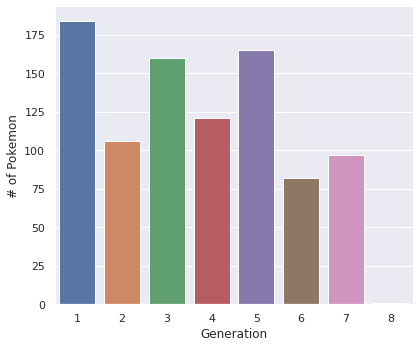

In [49]:
sns.catplot(
    x='GENERATION', 
    data=df,
    height=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Generation', '# of Pokemon')

plt.show()

In [50]:
#Count Legendary Pokemons
df['LEGENDARY'].value_counts()

False    821
True      95
Name: LEGENDARY, dtype: int64

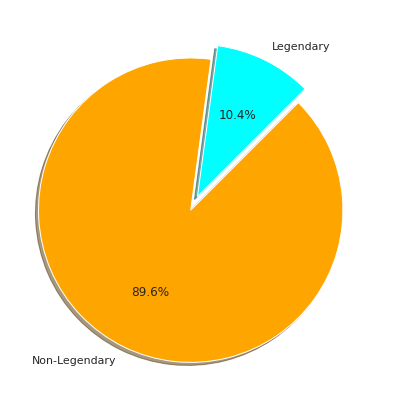

In [51]:
fig = plt.figure(figsize=(7,7))

colours = ["aqua", "orange"]
pokeLeg = df[df['LEGENDARY']==True]
pokeNon = df[df['LEGENDARY']==False]

legDist = [pokeLeg['NAME'].count(),pokeNon['NAME'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non-Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

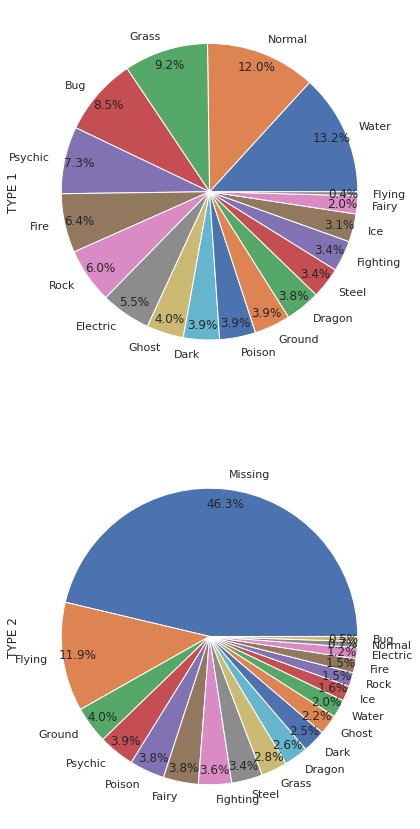

In [52]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(211)
df['TYPE 1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)
fig.add_subplot(212)
df['TYPE 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)
plt.show()

In [78]:
df['GENERATION'].value_counts().sort_values()

8      1
6     82
7     97
2    106
4    121
3    160
5    165
1    184
Name: GENERATION, dtype: int64

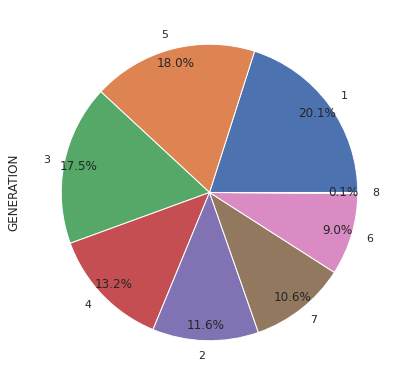

In [77]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(211)
df['GENERATION'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)

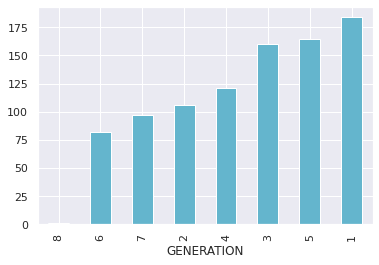

In [79]:
df.groupby([df['GENERATION']])['GENERATION'].count().sort_values().plot(kind='bar',color='c')

In [53]:
df['TYPE 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Fighting', 'Psychic',
       'Rock', 'Ghost', 'Dragon', 'Steel', 'Flying'], dtype=object)

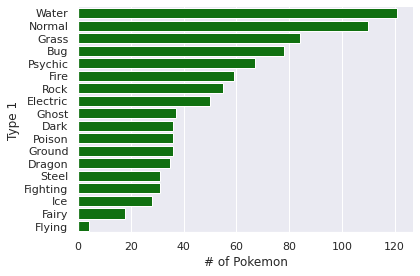

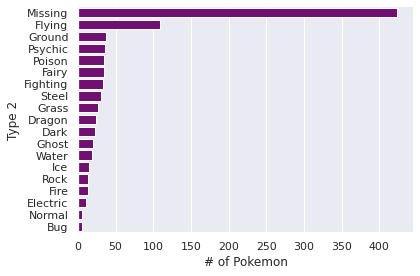

In [54]:
sns.catplot(
    y='TYPE 1',
    data=df,
    kind='count',
    order=df['TYPE 1'].value_counts().index,
    height=4,
    aspect=1.5,
    color='green'
).set_axis_labels('# of Pokemon', 'Type 1')

sns.catplot(
    y='TYPE 2',
    data=df,
    kind='count',
    order=df['TYPE 2'].value_counts().index,
    height=4,
    aspect=1.5,
    color='purple'
).set_axis_labels('# of Pokemon', 'Type 2');

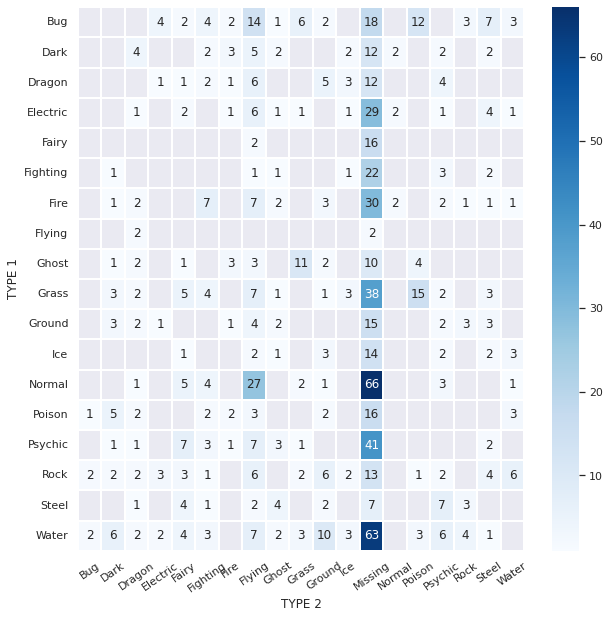

In [55]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    df[df['TYPE 2']!='None'].groupby(['TYPE 1', 'TYPE 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()

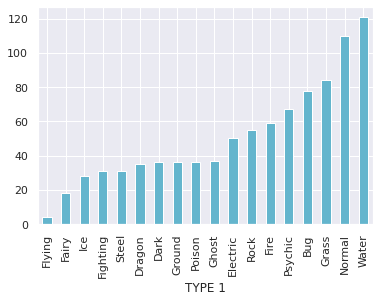

In [58]:
# 1.All type of pokemon count
df.groupby([df['TYPE 1']])['TYPE 1'].count().sort_values().plot(kind='bar',color='c')

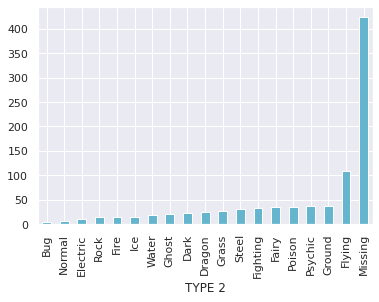

In [59]:
df.groupby([df['TYPE 2']])['TYPE 2'].count().sort_values().plot(kind='bar',color='c')

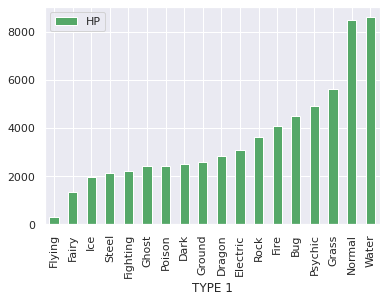

In [60]:
# 5.List of pokemon that rank of higher HP.
df.groupby([df['TYPE 1']]).agg({'HP':'sum'}).sort_values(['HP']).plot(kind='bar',color='g')

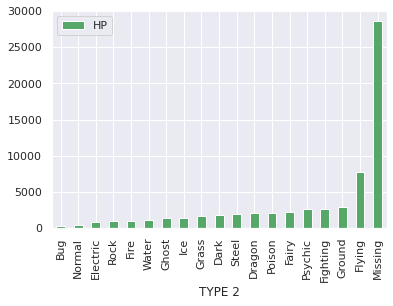

In [61]:
# 5.List of pokemon that rank of higher HP.
df.groupby([df['TYPE 2']]).agg({'HP':'sum'}).sort_values(['HP']).plot(kind='bar',color='g')

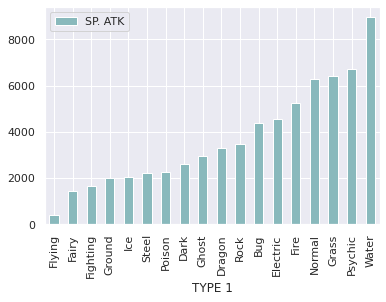

In [67]:
# 4.List of pokemon that rank of attack.
df.groupby([df['TYPE 1']]).agg({'SP. ATK':'sum'}).sort_values(['SP. ATK']).plot(kind='bar',color='#89B9BC')

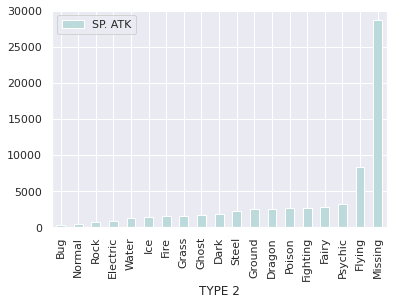

In [68]:
# 4.List of pokemon that rank of attack.
df.groupby([df['TYPE 2']]).agg({'SP. ATK':'sum'}).sort_values(['SP. ATK']).plot(kind='bar',color='#BCDADC')

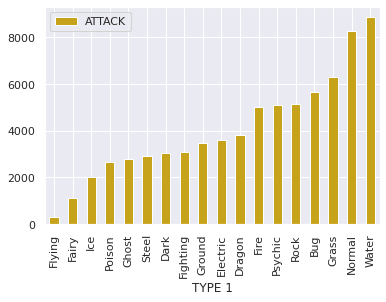

In [69]:
# 4.List of pokemon that rank of attack.
df.groupby([df['TYPE 1']]).agg({'ATTACK':'sum'}).sort_values(['ATTACK']).plot(kind='bar',color='#C7A21B')

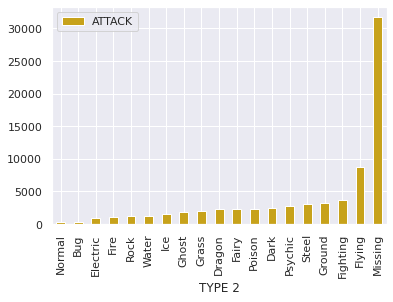

In [70]:
# 4.List of pokemon that rank of attack.
df.groupby([df['TYPE 2']]).agg({'ATTACK':'sum'}).sort_values(['ATTACK']).plot(kind='bar',color='#C7A21B')

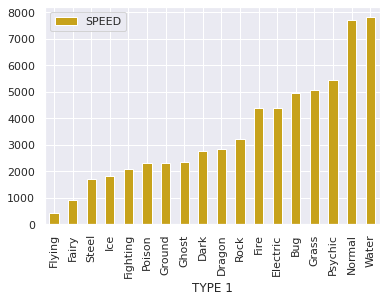

In [71]:
# 4.List of pokemon that rank of attack.
df.groupby([df['TYPE 1']]).agg({'SPEED':'sum'}).sort_values(['SPEED']).plot(kind='bar',color='#C7A21B')

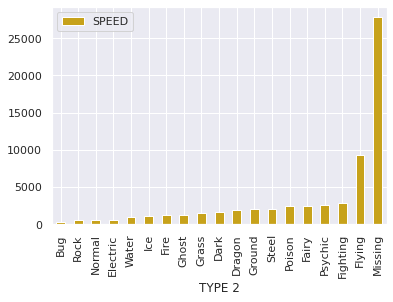

In [72]:
# 4.List of pokemon that rank of attack.
df.groupby([df['TYPE 2']]).agg({'SPEED':'sum'}).sort_values(['SPEED']).plot(kind='bar',color='#C7A21B')

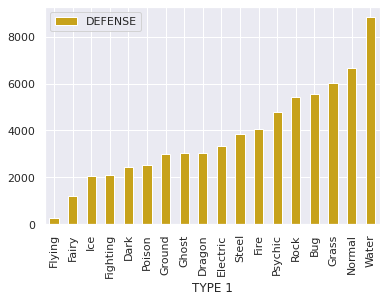

In [76]:
df.groupby([df['TYPE 1']]).agg({'DEFENSE':'sum'}).sort_values(['DEFENSE']).plot(kind='bar',color='#C7A21B')

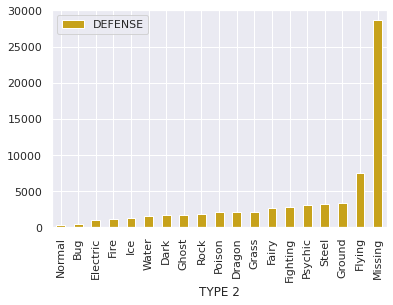

In [75]:
df.groupby([df['TYPE 2']]).agg({'DEFENSE':'sum'}).sort_values(['DEFENSE']).plot(kind='bar',color='#C7A21B')